In [6]:
from fastai import *

In [4]:
from fastai.collab import *
from fastai.tabular import *

In [2]:
user, item, title = 'userId', 'movieId', 'title'

In [7]:
path = untar_data(URLs.ML_SAMPLE)

In [8]:
path

PosixPath('/home/nihargajre/.fastai/data/movie_lens_sample')

In [9]:
ratings = pd.read_csv(path / 'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [10]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [11]:
y_range = [0, 5.5]

In [12]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [14]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [64, 50]             5050       True      
______________________________________________________________________
Embedding            [64, 50]             5050       True      
______________________________________________________________________
Embedding            [64, 1]              101        True      
______________________________________________________________________
Embedding            [64, 1]              101        True      
______________________________________________________________________

Total params:  10302
Total trainable params:  10302
Total non-trainable params:  0


In [15]:
learn.fit_one_cycle(3, 5e-3)

epoch     train_loss  valid_loss
1         1.615715    0.928922    
2         0.849082    0.675017    
3         0.649924    0.664977    


In [17]:
path = Path('data/ml-100k/')
path.mkdir(exist_ok=True)

In [18]:
path

PosixPath('data/ml-100k')

In [19]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2018-12-28 20:39:10--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  11.4MB/s    in 0.4s    

2018-12-28 20:39:10 (11.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [20]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [31]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                     names=[user, item, 'rating', 'timestamp'])

ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [32]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1',
                     names=[item, 'title', 'date', 'N', 'url',
                            *[f'g{i}' for i in range(19)]])

In [33]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
ratings.shape

(100000, 4)

In [35]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [36]:
data =  CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1,
                                item_name=title)

In [37]:
data.show_batch()

userId,title,target
299,'Til There Was You (1997),2.0
297,Sense and Sensibility (1995),5.0
731,"Streetcar Named Desire, A (1951)",3.0
279,This Is Spinal Tap (1984),5.0
369,Return of the Jedi (1983),5.0


In [38]:
y_range = [0, 5.5]

In [39]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [40]:
learn.lr_find()

epoch     train_loss  valid_loss
1         3.262081                
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


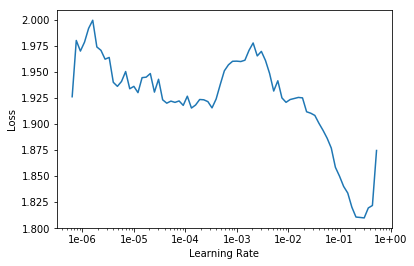

In [42]:
learn.recorder.plot(skip_end=15)

In [43]:
lr = 5e-3

In [44]:
learn.fit_one_cycle(5, lr)

epoch     train_loss  valid_loss
1         0.938730    0.949610    
2         0.844952    0.883922    
3         0.765416    0.837833    
4         0.651688    0.814335    
5         0.559783    0.813702    


In [45]:
learn.save('dotprod')

## Interpretation

In [46]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList
y: FloatList (90000 items)
[FloatItem 3.0, FloatItem 3.0, FloatItem 5.0, FloatItem 3.0, FloatItem 5.0]...
Path: .
x: CollabList (90000 items)
[CollabLine userId 196; title Kolya (1996); , CollabLine userId 63; title Kolya (1996); , CollabLine userId 226; title Kolya (1996); , CollabLine userId 154; title Kolya (1996); , CollabLine userId 306; title Kolya (1996); ]...
Path: .;

Valid: LabelList
y: FloatList (10000 items)
[FloatItem 3.0, FloatItem 5.0, FloatItem 4.0, FloatItem 3.0, FloatItem 3.0]...
Path: .
x: CollabList (10000 items)
[CollabLine userId 498; title Casino (1995); , CollabLine userId 642; title Pocahontas (1995); , CollabLine userId 58; title 2001: A Space Odyssey (1968); , CollabLine userId 495; title Cat People (1982); , CollabLine userId 618; title Philadelphia (1993); ]...
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
 

In [47]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [49]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [50]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [52]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i, b in zip(top_movies, movie_bias)]

In [54]:
item0 = lambda x: x[0]

In [55]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3662),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3332),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2944), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2899), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2864), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2477), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2353), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2347), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2328), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2240), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2191), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2178), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2144), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2136), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2113), 'Tales 

In [56]:
sorted(movie_ratings, key=item0, reverse=True)[:15]

[(tensor(0.5823), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5806), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5751), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5497), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5354), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5232), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5104), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5080), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4960), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4937), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4854), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4773), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4738), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4627), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4544), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667)]

In [57]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [58]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [71]:
fac0, fac1, fac2 = movie_pca.t()

In [72]:
movie_comp = [(f, i) for f, i in zip(fac0, top_movies)]

In [73]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2997), 'Home Alone 3 (1997)'),
 (tensor(1.2323), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.2108), "McHale's Navy (1997)"),
 (tensor(1.1893), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1663), 'Bio-Dome (1996)'),
 (tensor(1.1649), 'Jungle2Jungle (1997)'),
 (tensor(1.1249), 'Leave It to Beaver (1997)'),
 (tensor(1.1220), 'Congo (1995)'),
 (tensor(1.0740), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.0423), 'Mr. Wrong (1996)')]

In [74]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1072), 'Chinatown (1974)'),
 (tensor(-1.0962), 'Casablanca (1942)'),
 (tensor(-1.0952), 'Close Shave, A (1995)'),
 (tensor(-1.0672), 'Godfather, The (1972)'),
 (tensor(-1.0036), 'Wrong Trousers, The (1993)'),
 (tensor(-0.9835), 'Ran (1985)'),
 (tensor(-0.9830), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9729), 'When We Were Kings (1996)'),
 (tensor(-0.9715), 'Secrets & Lies (1996)'),
 (tensor(-0.9610), 'Citizen Kane (1941)')]

In [75]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [76]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9476), 'Keys to Tulsa (1997)'),
 (tensor(0.8907), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8725), 'Dead Man (1995)'),
 (tensor(0.8462), 'Night on Earth (1991)'),
 (tensor(0.7960), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7918), 'Lost Highway (1997)'),
 (tensor(0.7835), 'Trainspotting (1996)'),
 (tensor(0.7717), 'Road to Wellville, The (1994)'),
 (tensor(0.7693), 'Jude (1996)'),
 (tensor(0.7643), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)')]

In [77]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1599), 'Titanic (1997)'),
 (tensor(-1.1514), 'Braveheart (1995)'),
 (tensor(-1.1512), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9607), "It's a Wonderful Life (1946)"),
 (tensor(-0.8988), 'Hunt for Red October, The (1990)'),
 (tensor(-0.8767), 'Forrest Gump (1994)'),
 (tensor(-0.8748), 'American President, The (1995)'),
 (tensor(-0.8679), 'Star Wars (1977)'),
 (tensor(-0.8348), 'Pretty Woman (1990)'),
 (tensor(-0.8279), 'Independence Day (ID4) (1996)')]

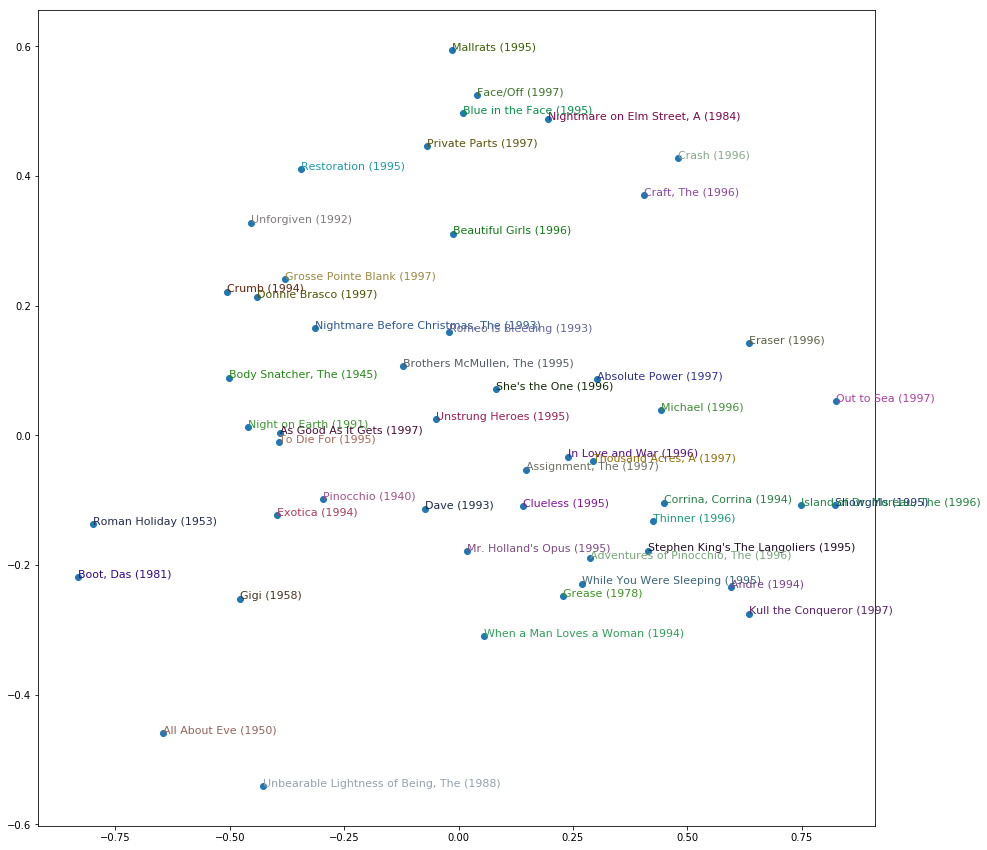

In [79]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
#idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15, 15))
plt.scatter(X, Y)

for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3) * 0.7, fontsize=11)

plt.show()